## Bias Estimation Plots

### Initialization 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os.path
import astropy.table
import astropy.io.fits as fits
import numpy as np
from copy import deepcopy
import random

In [3]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
AEGIS = '/Users/Ismael/aegis/WeakLensingDeblending/'
os.chdir(AEGIS)

### Read Simulation Outputs 

In [4]:
data = fits.open('data/fits/SimOSD1.fits')
cat = astropy.table.Table.read(data,hdu=1)

In [109]:
#some interesting subsets of the simulation
iso_gal = cat[cat['grp_size'] == 1] #isolated galaxies
grp_gal = cat[cat['grp_size'] != 1] #galaxies in a group of 2 or more. 

#'good' galaxies satisfy the reasonable criteria below.
good = cat[(cat['snr_iso'] > 10) & (cat['sigma_m'] > .2)]
iso_galg  = iso_gal[(iso_gal['snr_iso'] > 10) & (iso_gal['sigma_m'] > .2)] #'good' isolated galaxies
grp_galg  = grp_gal[(grp_gal['snr_grp'] > 10 )& (grp_gal['sigma_m'] > .2)] #'good' non isolated galaxies.

#gold sample galaxies 
gold = cat[(cat['ab_mag'] < 25.3)] 
iso_gold = iso_gal[(iso_gal['ab_mag'] < 25.3)] #isolated galaxies in the gold sample 
grp_gold = grp_gal[(grp_gal['ab_mag'] < 25.3)] #non isolated galaxies in the gold sample



In [110]:
def leaveRandom(sz,cat):
    new_cat = deepcopy(cat)
    rm_rows = random.sample(xrange(0,len(cat)-1), len(cat) - sz)
    new_cat.remove_rows(rm_rows)
    return new_cat 

In [111]:
#get a smaller sample of each of the catalogs for illustrative purposes 
N = 10000
cat_small = leaveRandom(N, cat)
good_small = leaveRandom(N, good)
gold_small = leaveRandom(N, gold)

In [112]:
#number of galaxies in each category
print 'total number of galaxies is {0}'.format(len(cat))
print 'total number of isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(iso_gal), float(len(iso_gal))/len(cat)*100)
print 'total number of non-isolated galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(grp_gal), float(len(grp_gal))/len(cat)*100)
print 'total number of good galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(good), float(len(good))/len(cat)*100)
print 'total number of good isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_galg),float(len(iso_galg))/len(iso_gal)*100, float(len(iso_galg))/len(cat)*100)
print 'total number of good non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_galg), float(len(grp_galg))/len(grp_gal)*100,  float(len(grp_galg))/len(cat)*100)
print 'total number of gold galaxies is {0}, they constitute {1:.2f}% of the total.'.format(len(gold), float(len(gold))/len(cat)*100)
print 'total number of gold isolated galaxies is {0}, they constitute {1:.2f}% of the isolated galaxies, and {2:.2f}% of the total.'.format(len(iso_gold),float(len(iso_gold))/len(iso_gal)*100, float(len(iso_gold))/len(cat)*100)
print 'total number of gold non-isolated galaxies is {0}, they constitute {1:.2f}% of the non-isolated galaxies, and {2:.2f}% of the total.'.format(len(grp_gold),float(len(grp_gold))/len(grp_gal)*100, float(len(grp_gold))/len(cat)*100)


total number of galaxies is 861061
total number of isolated galaxies is 173437, they constitute 20.14% of the total.
total number of non-isolated galaxies is 687624, they constitute 79.86% of the total.
total number of good galaxies is 194276, they constitute 22.56% of the total.
total number of good isolated galaxies is 16353, they constitute 9.43% of the isolated galaxies, and 1.90% of the total.
total number of good non-isolated galaxies is 177678, they constitute 25.84% of the non-isolated galaxies, and 20.63% of the total.
total number of gold galaxies is 197083, they constitute 22.89% of the total.
total number of gold isolated galaxies is 15640, they constitute 9.02% of the isolated galaxies, and 1.82% of the total.
total number of gold non-isolated galaxies is 181443, they constitute 26.39% of the non-isolated galaxies, and 21.07% of the total.


### Blended vs unblended biases on shear measurements

In [113]:
#produce different plots with the biases calculated from the fisher formalism. 
def shear_biases_plots(cat,good,gold,save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 2,3
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g1_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for good galaxies',fontsize=14)
    plt.xlabel('bias on g1 ',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g1_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g1',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 4) 
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(cat['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 5) 
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(good['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for good galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 6) 
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g2')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g2 for gold galaxies',fontsize=14)
    plt.xlabel('bias on g2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


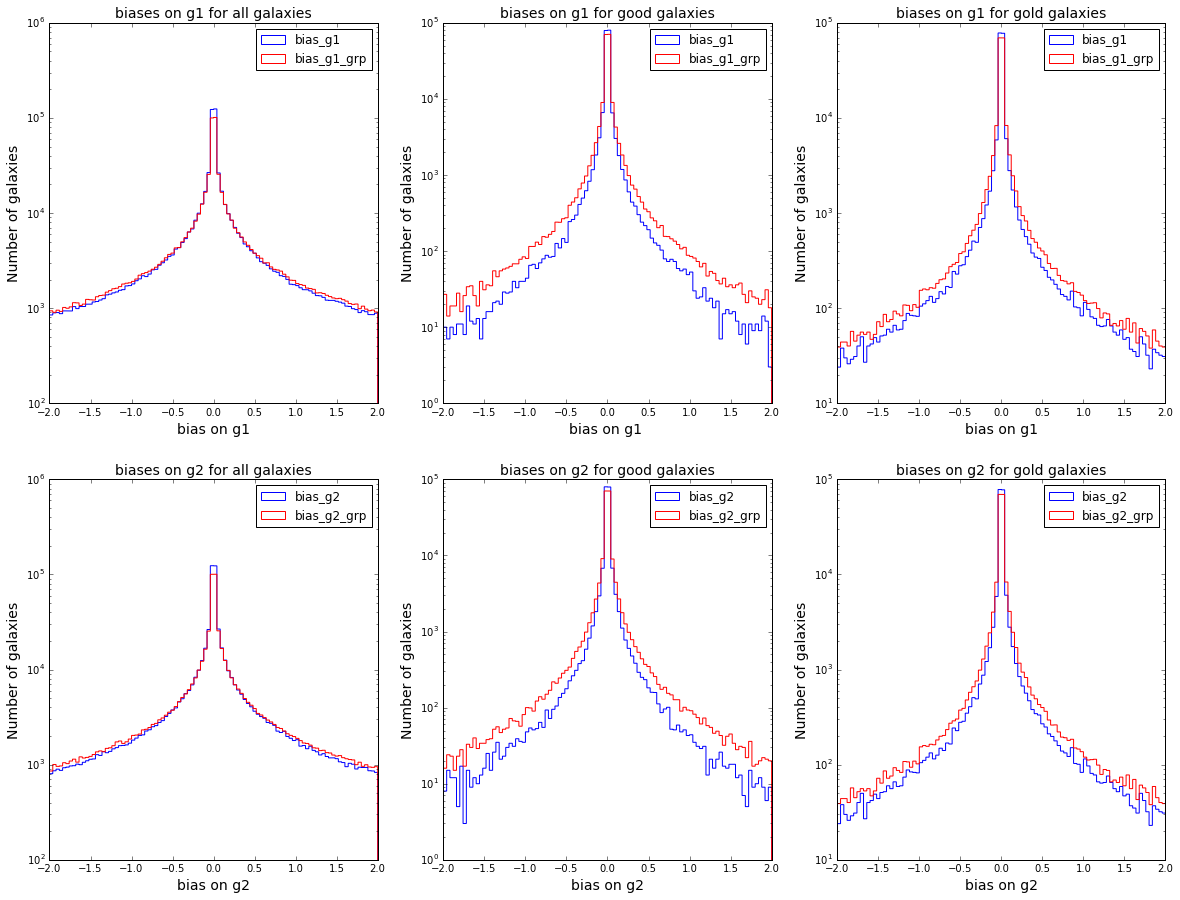

In [114]:
shear_biases_plots(cat,good,gold)

### Scatter plots of biases

In [115]:
#scatter plot of bias_g vs bias_g_grp 
def scatter_shear_plots(cat,good,gold, save=None):
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,10))
    nrow,ncol = 2,3
    #
    plt.subplot(nrow, ncol, 1) 
    plt.scatter(cat['bias_g1'],cat['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for all galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.scatter(good['bias_g1'],good['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for good galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.scatter(gold['bias_g1'],gold['bias_g1_grp'],alpha=.3)
    plt.title('scatter of biases for gold galaxies',fontsize=14)
    plt.xlabel('bias_g1',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g1_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 4) 
    plt.scatter(cat['bias_g2'],cat['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for all galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 5)
    plt.scatter(good['bias_g2'],good['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for good galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)
    #
    plt.subplot(nrow, ncol, 6) 
    plt.scatter(gold['bias_g2'],gold['bias_g2_grp'],alpha=.3)
    plt.title('scatter of biases for gold galaxies',fontsize=14)
    plt.xlabel('bias_g2',fontsize=14)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.ylabel('bias_g2_grp',fontsize=14)

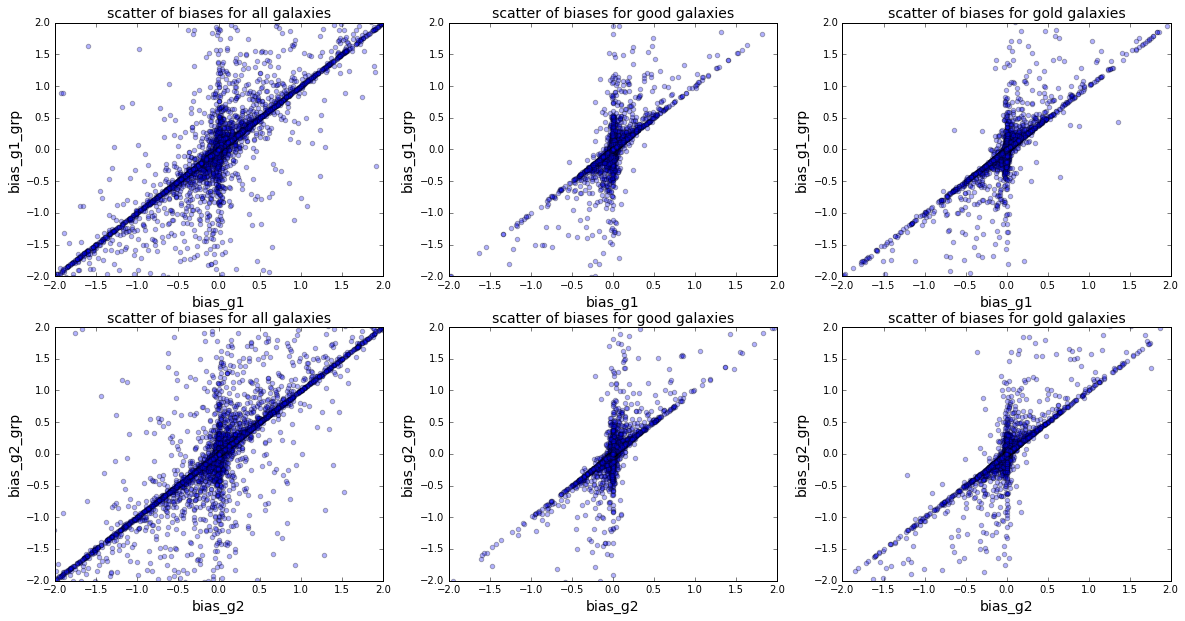

In [116]:
scatter_shear_plots(cat_small,good_small,gold_small)

### Purity and Unblended Bias on Shear Plots 

In [117]:
#some plot from the notebook ShearEstimatorPlots using biases from the Fisher Formalism. 
#made a cut on biases for g1 and g2 in range (-2,2)
def purity_bias_shears(cat,cat_small,good,good_small, gold, gold_small, save=None):
    selected_cat = (cat['bias_g1'] < 2.) & (cat['bias_g1'] > -2.) & (cat['bias_g2'] < 2.) & (cat['bias_g2'] > -2.) #makes plot more feasible
    selected_good = (good['bias_g1'] < 2.) & (good['bias_g1'] > -2.) & (good['bias_g2'] < 2.) & (good['bias_g2'] > -2.)
    selected_gold = (gold['bias_g1'] < 2.) & (gold['bias_g1'] > -2.) & (gold['bias_g2'] < 2.) & (gold['bias_g2'] > -2.)
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 3,5
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(cat['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,2)
    plt.plot(cat_small['bias_g1'],cat_small['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,3)
    plt.hist(cat['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for all galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,4)
    plt.plot(cat_small['purity'],cat_small['bias_g1'],'r+',label='bias_g1')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,5)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (cat[selected_cat]['purity'] >= xlo) & (cat[selected_cat]['purity'] < xhi)
        dg1 = cat[selected_cat]['bias_g1'][in_range]
        dg2 = cat[selected_cat]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Bias covariance',fontsize=14)
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 6) 
    plt.hist(good['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(good['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for good galaxies')
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,7)
    plt.plot(good_small['bias_g1'],good_small['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,8)
    plt.hist(good['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for good galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,9)
    plt.plot(good_small['purity'],good_small['bias_g1'],'r+',label='bias_g1')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,10)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (good[selected_good]['purity'] >= xlo) & (good[selected_good]['purity'] < xhi)
        dg1 = good[selected_good]['bias_g1'][in_range]
        dg2 = good[selected_good]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('biases covariance',fontsize=14)
    plt.axhline(0,color='green')


    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 11) 
    plt.hist(gold['bias_g1'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1')
    plt.hist(gold['bias_g2'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for gold galaxies')
    plt.xlabel('bias on g1,2',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,12)
    plt.plot(gold_small['bias_g1'],gold_small['bias_g2'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1',fontsize=14)
    plt.ylabel('bias_g2',fontsize=14)
    plt.grid()
    #
    plt.subplot(nrow,ncol,13)
    plt.hist(gold['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for gold galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,14)
    plt.plot(gold_small['purity'],gold_small['bias_g1'],'r+',label='bias_g1')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('bias_g1',fontsize=14)
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,15)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (gold[selected_gold]['purity'] >= xlo) & (gold[selected_gold]['purity'] < xhi)
        dg1 = gold[selected_gold]['bias_g1'][in_range]
        dg2 = gold[selected_gold]['bias_g2'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('biases covariance',fontsize=14)
    plt.axhline(0,color='green')


    ##
    plt.tight_layout()

[ 0.56923227  0.54885199  0.5208669   0.51751078  0.50052466  0.48002578
  0.46431885  0.44841109  0.43143654  0.41445088  0.40381259  0.36837983]
[ 0.5662742   0.54438797  0.52182285  0.50787482  0.49781253  0.48276325
  0.46159505  0.44856632  0.43850508  0.41118325  0.40432554  0.370529  ]
[-0.00319381  0.00548286 -0.01693667  0.01416484 -0.01024343 -0.00100715
  0.01513102  0.01586185 -0.01976583 -0.0062112  -0.01163866  0.00136552]
[ 0.18070316  0.16663898  0.16293329  0.15425725  0.16055141  0.14838461
  0.13151703  0.13741991  0.13940377  0.1289725   0.12192091  0.11396083]
[ 0.17344614  0.17962424  0.16977931  0.15019764  0.15958763  0.14181116
  0.1371315   0.13811228  0.14100649  0.12789567  0.12421231  0.11496359]
[-0.02176156 -0.00081385 -0.04550882 -0.06013147 -0.11554143 -0.05615908
 -0.00387507 -0.02559607 -0.05006884 -0.02890431  0.0138163  -0.03812123]
[ 0.18363332  0.18247653  0.19798735  0.18079204  0.19065951  0.18291221
  0.18928841  0.18565772  0.18364902  0.19169

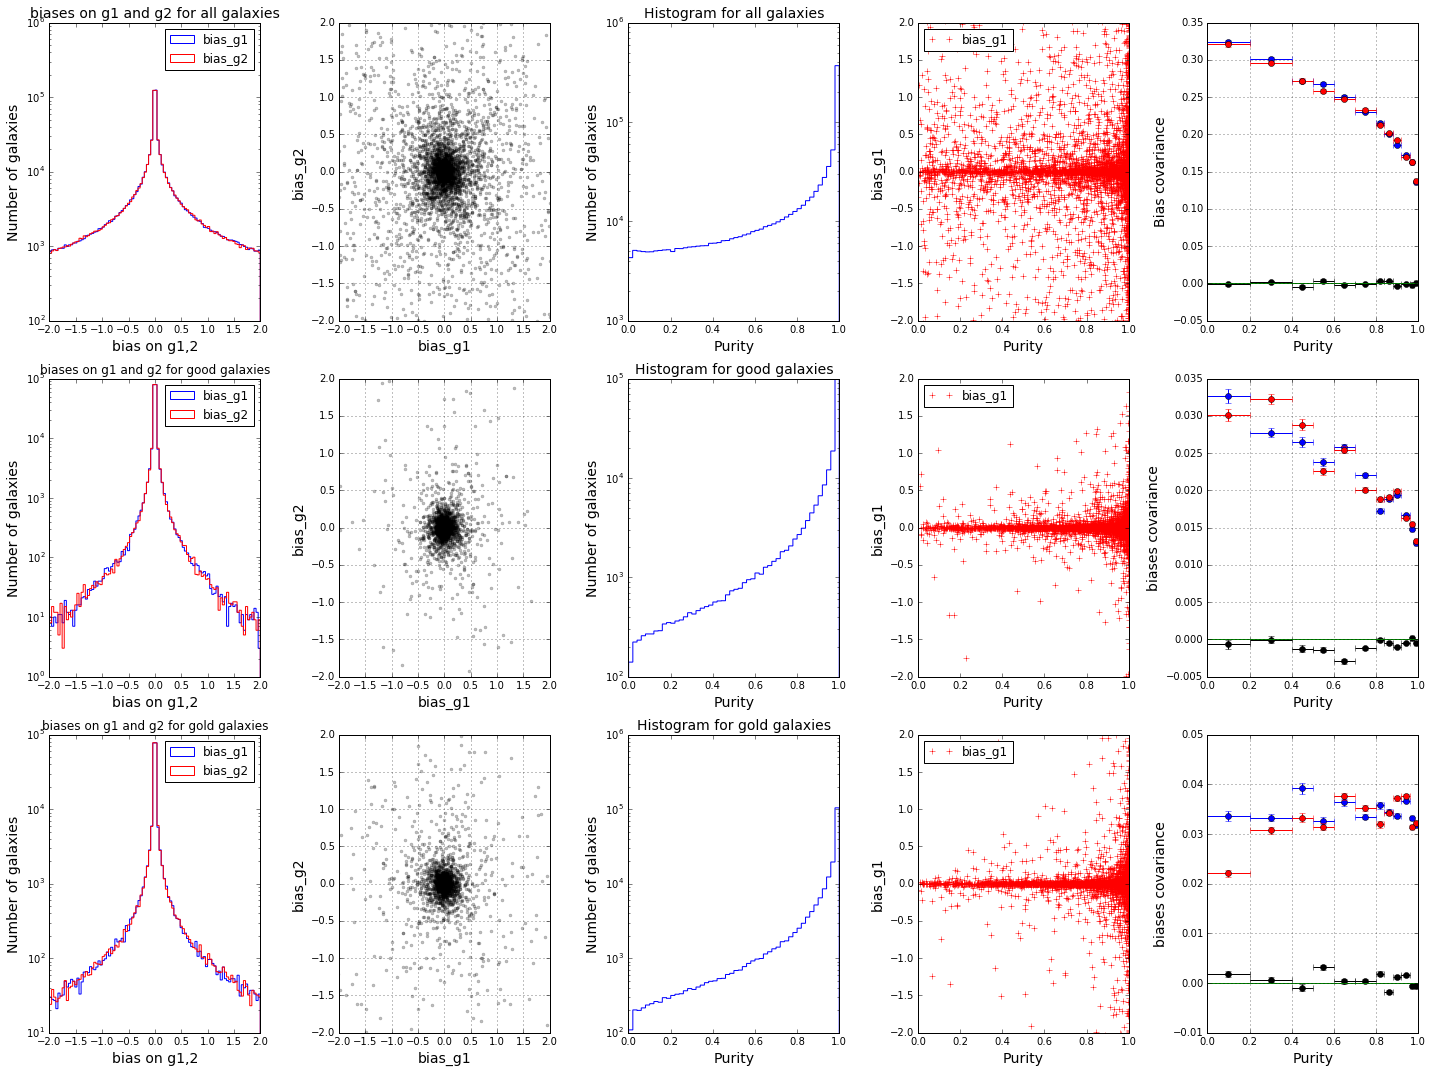

In [118]:
purity_bias_shears(cat,cat_small, good,good_small, gold,gold_small)

### Purity and Blended Bias on Shear Plots 

In [119]:
#some plot from the notebook ShearEstimatorPlots using biases from the Fisher Formalism. 
#made a cut on biases for g1 and g2 in range (-2,2)
def purity_biasgrp_shears(cat,cat_small, good,good_small, gold,gold_small, save=None):
    selected_cat = (cat['bias_g1_grp'] < 2.) & (cat['bias_g1_grp'] > -2.) & (cat['bias_g2_grp'] < 2.) & (cat['bias_g2_grp'] > -2.) #makes plot more feasible
    selected_good = (good['bias_g1_grp'] < 2.) & (good['bias_g1_grp'] > -2.) & (good['bias_g2_grp'] < 2.) & (good['bias_g2_grp'] > -2.)
    selected_gold = (gold['bias_g1_grp'] < 2.) & (gold['bias_g1_grp'] > -2.) & (gold['bias_g2_grp'] < 2.) & (gold['bias_g2_grp'] > -2.)
    g_min = -2
    g_max = 2
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 3,5
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(cat['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(cat['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for all galaxies',fontsize=14)
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,2)
    plt.plot(cat_small['bias_g1_grp'],cat_small['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,3)
    plt.hist(cat['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for all galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,4)
    plt.plot(cat_small['purity'],cat_small['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,5)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (cat[selected_cat]['purity'] >= xlo) & (cat[selected_cat]['purity'] < xhi)
        dg1 = cat[selected_cat]['bias_g1_grp'][in_range]
        dg2 = cat[selected_cat]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('Bias covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 6) 
    plt.hist(good['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(good['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for good galaxies')
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,7)
    plt.plot(good_small['bias_g1_grp'],good_small['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,8)
    plt.hist(good['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for good galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,9)
    plt.plot(good_small['purity'],good_small['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,10)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (good[selected_good]['purity'] >= xlo) & (good[selected_good]['purity'] < xhi)
        dg1 = good[selected_good]['bias_g1_grp'][in_range]
        dg2 = good[selected_good]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

    #
    
    plt.subplot(nrow, ncol, 11) 
    plt.hist(gold['bias_g1_grp'],range=[g_min,g_max],bins=100,histtype='step',label='bias_g1_grp')
    plt.hist(gold['bias_g2_grp'],range=[g_min,g_max],bins=100,color='red',histtype='step',label='bias_g2_grp')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on g1 and g2 for gold galaxies')
    plt.xlabel('bias on g1,2_grp',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,12)
    plt.plot(gold_small['bias_g1_grp'],gold_small['bias_g2_grp'],'k.',alpha=0.25)
    plt.xlim(g_min, g_max)
    plt.ylim(g_min, g_max)
    plt.xlabel('bias_g1_grp')
    plt.ylabel('bias_g2_grp')
    plt.grid()
    #
    plt.subplot(nrow,ncol,13)
    plt.hist(gold['purity'], bins=50,histtype='step')
    plt.xlabel('Purity',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    plt.yscale('log')
    plt.title('Histogram for gold galaxies',fontsize=14)
    #
    plt.subplot(nrow,ncol,14)
    plt.plot(gold_small['purity'],gold_small['bias_g1_grp'],'r+',label='bias_g1_grp')
    plt.xlabel('Purity')
    plt.ylabel('bias_g1_grp')
    plt.ylim(g_min, g_max)
    plt.legend(loc='upper left')
    #
    plt.subplot(nrow,ncol,15)
    bins = np.array([0.,0.2,0.4,0.5,0.6,0.7,0.8,0.84,0.88,0.92,0.96,0.98,1.00])
    nbins = len(bins)-1
    cov = np.empty((nbins,2,2))
    n = np.empty(nbins,dtype=int)
    for i in range(nbins):
        xlo,xhi = bins[i],bins[i+1]
        in_range = (gold[selected_gold]['purity'] >= xlo) & (gold[selected_gold]['purity'] < xhi)
        dg1 = gold[selected_gold]['bias_g1_grp'][in_range]
        dg2 = gold[selected_gold]['bias_g2_grp'][in_range]
        n[i] = np.count_nonzero(in_range)
        cov[i] = np.cov(dg1,dg2)
    rms1 = np.sqrt(cov[:,0,0])
    rms2 = np.sqrt(cov[:,1,1])
    rho12 = cov[:,0,1]/(rms1*rms2)
    print rms1
    print rms2
    print rho12
    # Use Wishart distribution variances divided by (n-1)**2 to estimate errors in the covariances.
    cov_err = np.sqrt((cov**2 + np.einsum('kii,kjj->kij',cov,cov))/(n[:,np.newaxis,np.newaxis]-1.))
    x = 0.5*(bins[1:]+bins[:-1])
    dx = 0.5*(bins[1:]-bins[:-1])
    ##
    plt.errorbar(x,cov[:,0,0],yerr=cov_err[:,0,0],xerr=dx,color='b',fmt='o',label='$<\delta g_1^2>$')
    plt.errorbar(x,cov[:,1,1],yerr=cov_err[:,1,1],xerr=dx,color='r',fmt='o',label='$<\delta g_2^2>$')
    plt.errorbar(x,cov[:,0,1],yerr=cov_err[:,0,1],xerr=dx,color='k',fmt='o',label='$<\delta g_1 \delta g_2>$')
    #plt.legend()
    plt.xlim(0.,1.)
    plt.grid()
    plt.xlabel('Purity')
    plt.ylabel('biases covariance')
    plt.axhline(0,color='green')
    ##
    plt.tight_layout()

[ 0.70241724  0.65933356  0.64017186  0.61664105  0.58742419  0.55498135
  0.52332776  0.51042805  0.48441092  0.44444804  0.42003282  0.37097084]
[ 0.70714348  0.66055672  0.64410487  0.60556212  0.58863687  0.55888994
  0.52930625  0.51186687  0.49080462  0.44420445  0.42104832  0.37447799]
[ 0.007554   -0.00237106  0.00249385 -0.00108469 -0.01041093  0.01886788
  0.00034749 -0.00411663 -0.01179067 -0.00720766  0.00592518  0.00290548]
[ 0.3568388   0.33767295  0.32669821  0.32586657  0.2879037   0.27121806
  0.24502989  0.23688743  0.22079774  0.17605745  0.14656969  0.11925764]
[ 0.35533478  0.34134516  0.3214153   0.31194041  0.28356525  0.26779355
  0.24945474  0.23526657  0.22067768  0.17912414  0.14896     0.11995958]
[-0.11525128 -0.00284451  0.00929622 -0.01585247  0.03143774 -0.00696627
 -0.0167231  -0.03475767 -0.02164868 -0.01250603  0.0201851  -0.02438177]
[ 0.30180039  0.29473818  0.29703067  0.28575637  0.27782536  0.27178882
  0.26040635  0.26005432  0.2500048   0.23679

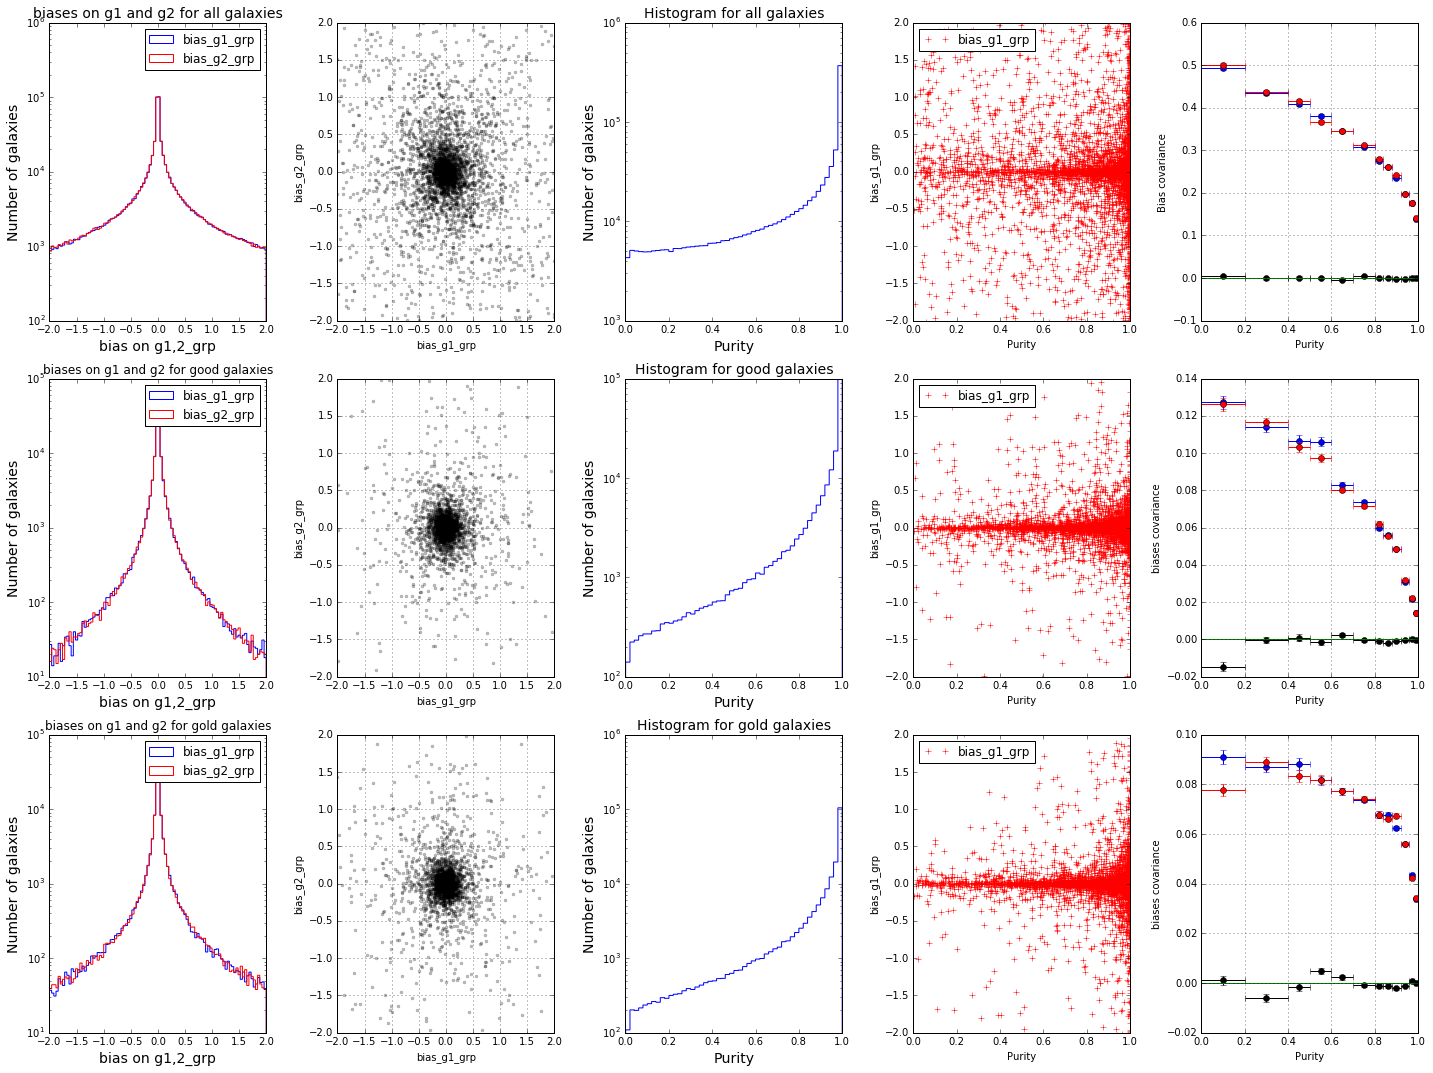

In [121]:
purity_biasgrp_shears(cat,cat_small, good,good_small, gold,gold_small)

### Biases of flux measurement 

In [122]:
#similar plots but with bias on flux
def flux_biases_plots(cat,save=None):
    f_min = -3
    f_max = 3
    fig = plt.figure(figsize=(20,15))
    nrow,ncol = 1,3
    frac_bflux = cat['bias_f']/cat['flux']
    frac_bflux_grp = cat['bias_f_grp']/cat['flux']
    frac_bflux_g = good['bias_f']/good['flux']
    frac_bflux_grpg = good['bias_f_grp']/good['flux']
    frac_bflux_gold = gold['bias_f']/gold['flux']
    frac_bflux_grpgold = gold['bias_f_grp']/gold['flux']
    #
    plt.subplot(nrow, ncol, 1) 
    plt.hist(frac_bflux,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grp,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for all galaxies')
    plt.xlabel('bias on flux/flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 2) 
    plt.hist(frac_bflux_g,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpg,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for good galaxies')
    plt.xlabel('bias on flux/flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)
    #
    plt.subplot(nrow, ncol, 3) 
    plt.hist(frac_bflux_gold,range=[f_min,f_max],bins=100,histtype='step',label='bias_f/flux')
    plt.hist(frac_bflux_grpgold,range=[f_min,f_max],bins=100,color='red',histtype='step',label='bias_f_grp/flux')
    plt.legend()
    plt.yscale('log')
    plt.title('biases on flux for gold galaxies')
    plt.xlabel('bias on flux/flux',fontsize=14)
    plt.ylabel('Number of galaxies',fontsize=14)


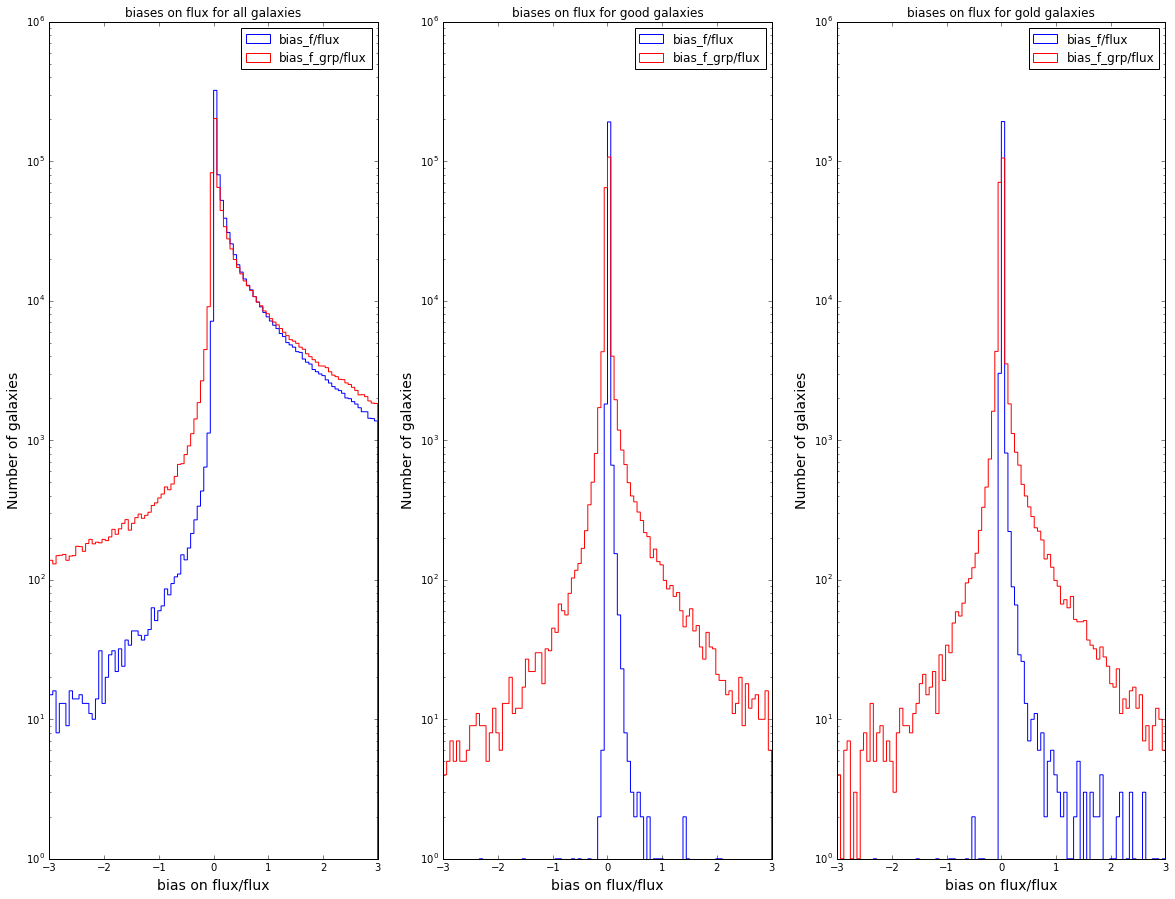

In [123]:
flux_biases_plots(cat)

### Means and variances of bias 

In [124]:
print 'The unblended biases for the catalog are:'
print 'Mean on bias_g1: \n{0}\n'.format(np.mean(cat['bias_g1']))
print 'Standard Deviation on bias_g1: \n{0}\n'.format(np.std(cat['bias_g1']))
print 'Mean on bias_g2: \n{0}\n'.format(np.mean(cat['bias_g2']))
print 'Variance on bias_g2: \n{0}\n\n'.format(np.std(cat['bias_g2'])) 
#
print 'The blended biases for the catalog are:'
print 'Mean on bias_g1_grp: \n{0}\n'.format(np.mean(cat['bias_g1_grp']))
print 'Standard Deviation on bias_g1_grp: \n{0}\n'.format(np.std(cat['bias_g1_grp']))
print 'Mean on bias_g2_grp: \n{0}\n'.format(np.mean(cat['bias_g2_grp']))
print 'Standard Deviation on bias_g2_grp: \n{0}\n\n'.format(np.std(cat['bias_g2_grp'])) 
#
print 'The unblended biases for the gold galaxies of the catalog are:'
print 'Mean on bias_g1_grp: \n{0}\n'.format(np.mean(gold['bias_g1']))
print 'Standard Deviation on bias_g1_grp: \n{0}\n'.format(np.std(gold['bias_g1']))
print 'Mean on bias_g2_grp: \n{0}\n'.format(np.mean(gold['bias_g2']))
print 'Standard Deviation on bias_g2_grp: \n{0}\n\n'.format(np.std(gold['bias_g2'])) 
#
print 'The blended biases for the gold galaxies of the catalog are:'
print 'Mean on bias_g1_grp: \n{0}\n'.format(np.mean(gold['bias_g1_grp']))
print 'Standard Deviation on bias_g1_grp: \n{0}\n'.format(np.std(gold['bias_g1_grp']))
print 'Mean on bias_g2_grp: \n{0}\n'.format(np.mean(gold['bias_g2_grp']))
print 'Standard Deviation on bias_g2_grp: \n{0}\n'.format(np.std(gold['bias_g2_grp'])) 

The unblended biases for the catalog are:
Mean on bias_g1: 
2.01501953229e+12

Standard Deviation on bias_g1: 
1.74777278503e+15

Mean on bias_g2: 
-1.34182679347e+12

Variance on bias_g2: 
1.88909720751e+15


The blended biases for the catalog are:
Mean on bias_g1_grp: 
1.45280237568e+11

Standard Deviation on bias_g1_grp: 
9.81384843756e+13

Mean on bias_g2_grp: 
5.66458384384e+11

Standard Deviation on bias_g2_grp: 
3.07440402825e+14


The unblended biases for the gold galaxies of the catalog are:
Mean on bias_g1_grp: 
-0.0106557905674

Standard Deviation on bias_g1_grp: 
24.7452812195

Mean on bias_g2_grp: 
-0.0232925545424

Standard Deviation on bias_g2_grp: 
18.5416641235


The blended biases for the gold galaxies of the catalog are:
Mean on bias_g1_grp: 
-1.57553672791

Standard Deviation on bias_g1_grp: 
609.86138916

Mean on bias_g2_grp: 
-1.14955210686

Standard Deviation on bias_g2_grp: 
565.954528809



### Group statistics of the catalog

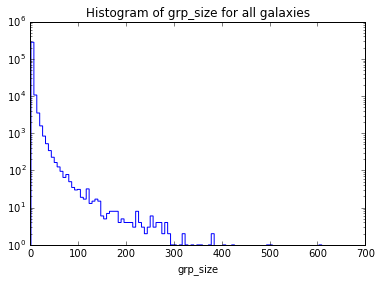

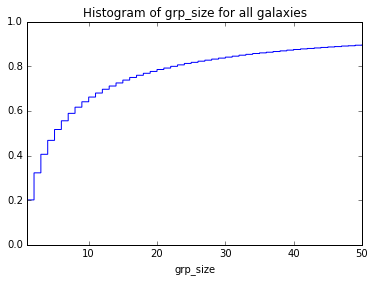

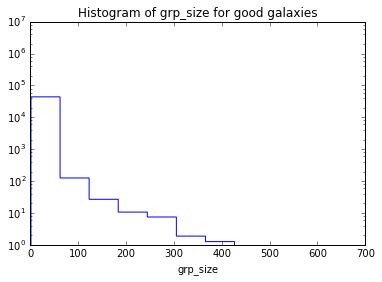

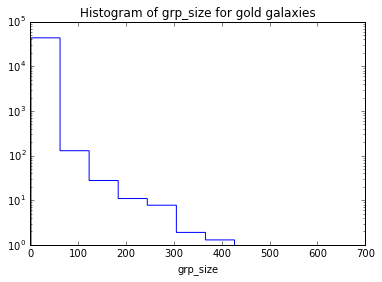

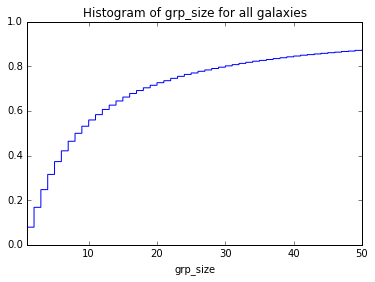

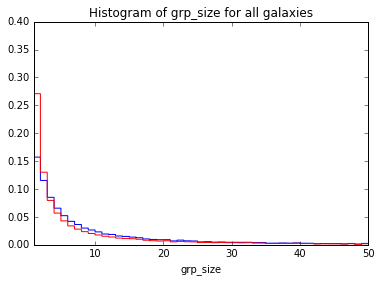

In [125]:
plt.figure()
w=1./cat['grp_size']
plt.hist(cat['grp_size'], histtype='step',weights=w,bins=100)
plt.yscale('log')
plt.xlabel('grp_size')
plt.title('Histogram of grp_size for each group of all galaxies')
#
plt.figure()
plt.hist(cat['grp_size'], histtype='step',bins=600,range=([0,600]),cumulative=True,normed=True)
plt.xlabel('grp_size')
plt.xlim(1,50)
plt.ylim(0,1.)
plt.title('Cumulative histogram of grp_size for all galaxies')
#
plt.figure()
w=1./good['grp_size']
plt.hist(good['grp_size'], histtype='step',weights=w)
plt.yscale('log')
plt.xlabel('grp_size')
plt.ylim(10e-1,10e6)
plt.title('Histogram of grp_size for each group of good galaxies')
#
plt.figure()
w = 1./gold['grp_size']
plt.hist(gold['grp_size'], histtype='step',weights=w)
plt.yscale('log')
plt.xlabel('grp_size')
plt.title('Histogram of grp_size for group of gold galaxies')
#
plt.figure()
plt.hist(gold['grp_size'], histtype='step',bins=600,range=([0,600]),cumulative=True,normed=True)
plt.xlabel('grp_size')
plt.xlim(1,50)
plt.ylim(0,1.)
plt.title('Cumulative histogram of grp_size for all galaxies')
#
catbsmall = cat[abs(cat['bias_g1']) < 1 ]
catbbig = cat[abs(cat['bias_g1']) > 1 ]
plt.figure()
# w=1./cat['grp_size']
plt.hist(catbsmall['grp_size'], histtype='step',bins=600,range=([0,600]),normed=True)
plt.hist(catbbig['grp_size'], histtype='step',bins=600,range=([0,600]),normed=True,color='red')
plt.xlabel('grp_size')
plt.xlim(1,50)
plt.ylim(0,.4)
plt.title('Histogram comparing big biased and small biased grp_size for all galaxies')

In [86]:
w = 1./cat['grp_size']

### Statistics of 'Bad' galaxies from catalog

In [ ]:
#define 'bad' as the ones that have e_fit = e_true + e_

### Correlation functions

In [ ]:
#use treecorr to look at various interesting correlation functions. 
import treecorr

In [ ]:
#calculate correlations for gold. 
#with bias on shear. 
#calculate and demonstrate treecorr for catalog1 
catalog1 = treecorr.Catalog(x=gold1['dx'],y=gold1['dy'],x_units='arcsec',y_units='arcsec',g1=gold1['bias_g1'],g2=gold1['bias_g2'])
gg1 = treecorr.GGCorrelation(min_sep=min_sep,max_sep=max_sep,nbins=10,sep_units='arcsec')
gg1.process(cat1)


In [ ]:
#do now with e.shear(cosmic_shear + bias_g1)


In [ ]:
catalog2 = treecorr.Catalog(x=gold1['dx'],y=gold1['dy'],x_units='arcsec',y_units='arcsec',g1=gold1['bias_g1'],g2=gold1['bias_g2'])



In [ ]:
cat

### Is there a correlation between group size and unphysical bias? 

(-10, 10)

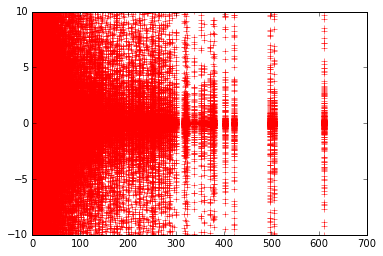

In [54]:
plt.plot(cat['grp_size'],cat['bias_g1'],'r+')

plt.ylim(-10,10)

In [50]:
plt.scatter?

(-10, 10)

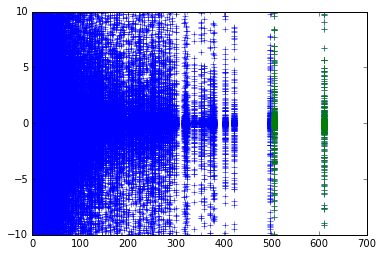

In [61]:
plt.plot(cat['grp_size'],cat['bias_g1_grp'],'b+')
s = cat[cat['grp_size']>500]
plt.plot(s['grp_size'],s['bias_g1_grp'],'g+')
plt.ylim(-10,10)

(-1, 1)

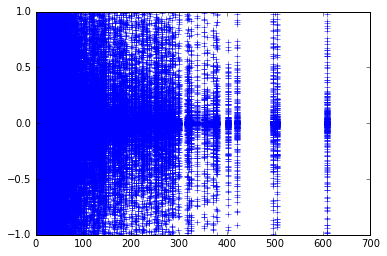

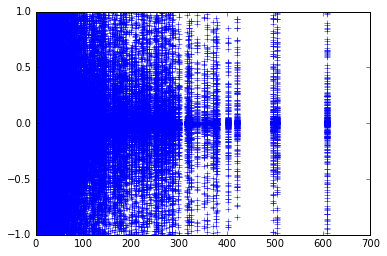

In [78]:
plt.figure()
ymin = -1
ymax = -ymin
cat_b = cat[abs(cat['bias_g1']) < 1 ]
cat_bgrp = cat[abs(cat['bias_g1_grp']) < 1 ]
plt.plot(cat_b['grp_size'],cat_b['bias_g1'],'b+')
plt.ylim(ymin,ymax)
plt.figure()
plt.plot(cat_bgrp['grp_size'],cat_bgrp['bias_g1_grp'],'b+')
plt.ylim(ymin,ymax)

In [42]:
len(cat[(cat['bias_g1'] <10) & (cat['bias_g1'] >-10)])


702107